# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sort_dataframeby_monthorweek as sd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly
import plotly.express as px
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)

In [2]:
# !pip install sort_dataframeby_monthorweek
# !pip install sorted-months-weekdays
# !pip install plotly
# !pip install chart_studio



In [3]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df=pd.read_csv("hotel_bookings.csv")

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


# Perform Data Cleaning

In [7]:
df.shape

(119390, 32)

In [8]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.drop(["agent","company"],axis=1,inplace=True)

In [10]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [11]:
df["country"].fillna(df['country'].value_counts().index[0],inplace=True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
filter1=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [14]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [15]:
data=df[~filter1]

In [16]:
data.shape

(119210, 30)

In [17]:
df[df['children']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


# Where do the guests come from

In [18]:
#Lets perform spatial analysis
previous_cancellations : 0
previous_bookings_not_canceled : 0
booking_changes : 0
days_in_waiting_list : 0
adr : 4.9
required_car_parking_spaces : 0
total_of_special_requests : 0
total_customer : 2
total_nights : 5
deposit_given : 0

In [19]:
data['is_canceled'].unique()

array([0, 1])

In [157]:
data["previous_cancellations"].unique()

array([ 0,  1,  2,  6,  3,  4, 11,  5, 13, 24, 21, 25, 14, 19, 26])

In [158]:
data["previous_bookings_not_canceled"].unique()

array([ 0,  1,  2,  3,  6,  4,  7, 10, 24,  5,  9,  8, 23, 13, 12, 14, 15,
       16, 17, 58, 59, 60, 61, 25, 26, 19, 20, 11, 18, 21, 22, 27, 28, 29,
       30, 31, 32, 33, 34, 62, 63, 64, 35, 36, 65, 66, 67, 37, 38, 39, 40,
       68, 69, 70, 71, 41, 42, 72, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57])

In [159]:
data["days_in_waiting_list"].unique()

array([  0,  83,   4,  14,  91,  85,  63,  15,  76,  16,  20,  22,  45,
        35,  43,  25,  13, 113,  18,   3,  28,  21,   9, 165,   2,  44,
        60,  34,  50, 107, 122, 185,  93, 109,   6,   8,  37, 105, 101,
        17,  53,   5,  38,  49,   1, 223, 100, 121,  52, 154,  64,  41,
       224,  31,  39,  56, 187, 176,  77,  48,  71, 111,  46,   7,  47,
        27,  84,  30, 175, 183,  10,  72,  65,  61,  99,  55,  96, 236,
       259, 207, 215, 160,  75, 120,  98,  23,  33,  32,  42,  12,  36,
        69,  62,  24,  80, 108,  40,  11, 117,  57,  54,  59,  26,  73,
       147, 379,  70, 178, 330,  19, 150, 125, 142,  58,  89, 174, 162,
       391,  68, 193,  81,  74, 116,  87,  97,  79, 167])

In [160]:
data["required_car_parking_spaces"].unique()

array([0, 1, 2, 8, 3])

In [161]:
data["total_of_special_requests"].unique()

array([1, 2, 0, 3, 4, 5])

In [162]:
data["total_customer"].unique()

array([ 2.,  4.,  3.,  1.,  5., 12., nan, 40., 26., 50., 27., 55., 20.,
        6., 10.])

In [20]:
data[data['is_canceled']==0]['country'].value_counts()/75011

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [21]:
len(data[data['is_canceled']==0])

75011

In [22]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [23]:
country_wise_data

,index,country
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [24]:
country_wise_data.columns=['country','no_of_guests']

In [25]:
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [26]:
map_guest=px.choropleth(country_wise_data,
                       locations=country_wise_data['country'],
                       color=country_wise_data['no_of_guests'],
                       hover_name=country_wise_data['country'],
                       title="Home Country of Guests")

In [27]:
map_guest.show()

# How Much do guest pay for a room per night

In [28]:
data2=data[data['is_canceled']==0]

In [29]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price( EUR)')

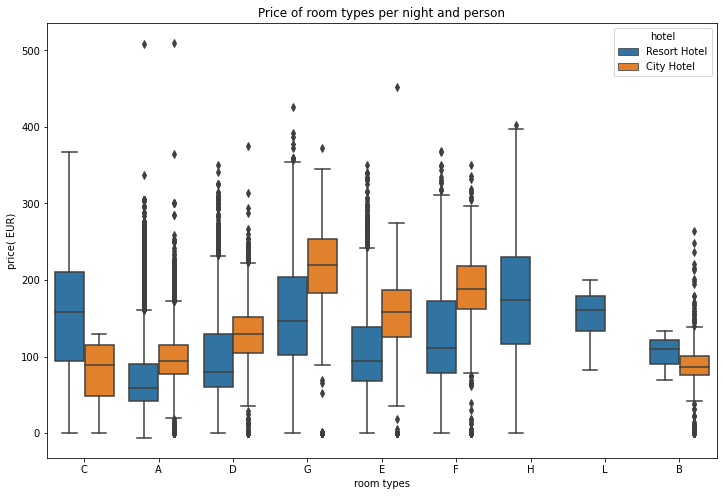

In [30]:
#seaborn boxplot
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=data2)
plt.title("Price of room types per night and person")
plt.xlabel('room types')
plt.ylabel("price( EUR)")

# Which are the most busy month 

In [31]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [32]:
data_resort=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_city=data[(data['hotel']=="City Hotel") & (data['is_canceled']==0)]

In [33]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [34]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()

In [35]:
rush_resort.columns=['month',"no_of_guest"]

In [36]:
rush_resort

,month,no_of_guest
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [37]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()

In [38]:
rush_city.columns=["month","no_of_guests"]

In [39]:
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [40]:
final_rush=rush_resort.merge(rush_city,on='month')

In [41]:
final_rush

,month,no_of_guest,no_of_guests
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [42]:
final_rush.columns=['month',"resort","city"]

In [43]:
final_rush

,month,resort,city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [44]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [45]:
final_rush.columns

Index(['month', 'resort', 'city'], dtype='object')

In [46]:
px.line(data_frame=final_rush,x='month',y=['resort','city'])

# Which Month has Highest ADR

In [47]:
data=sd.Sort_Dataframeby_Month(data,'arrival_date_month')

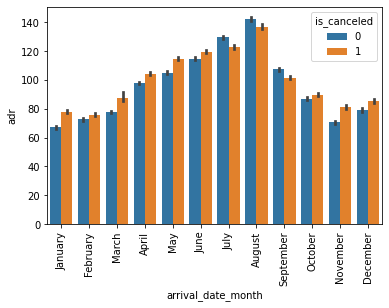

In [48]:
sns.barplot(x="arrival_date_month",y='adr',data=data,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

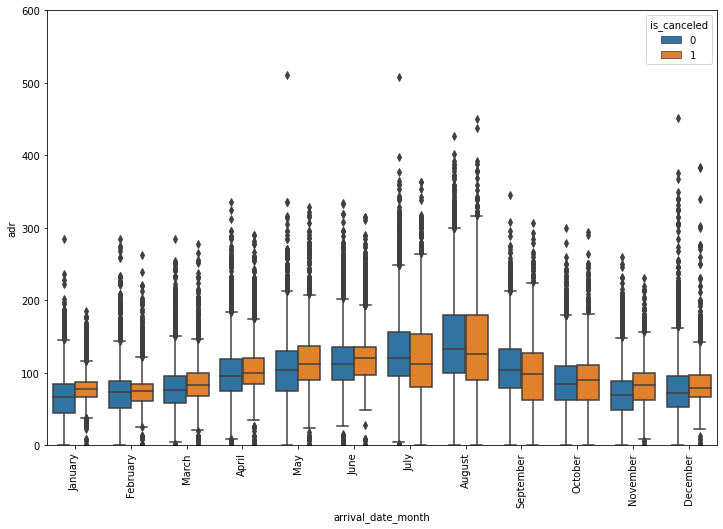

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x="arrival_date_month",y='adr',data=data,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.ylim(0,600)
plt.show()

# Lets analyse whether bookings were made only for weekdays or for weekends or for both ??
 

In [50]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [51]:
##lets create a relationship table
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
##lets define our own function
def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    if row[feature2]==0 and row[feature1]>0:
        return 'stay_just_weekend'
    elif row[feature2]>0 and row[feature1]==0:
        return 'stay_just_weekdays'
    elif row[feature2]>0 and row[feature1]>0:
        return "stay_both_weekdays_weekends"
    else:
        return "undefined data"

In [53]:
data2['weekend_or_weekday']=data2.apply(week_function,axis=1)

In [54]:
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,stay_just_weekdays


In [55]:
data2['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined data                   622
Name: weekend_or_weekday, dtype: int64

In [56]:
type(sd)

module

In [57]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [58]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3627
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined data                   30
August              stay_both_weekdays_weekends    4929
                    stay_just_weekdays             3137
                    stay_just_weekend               509
                    undefined data                   49
December            stay_both_weekdays_weekends    1901
                    stay_just_weekdays             2123
                    stay_just_weekend               298
                    undefined data                   69
February            stay_both_weekdays_weekends    2438
                    stay_just_weekdays             2514
                    stay_just_weekend               360
                    undefined data                   47
January             stay_both_weekdays_weekends    1550


In [59]:
group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [60]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [61]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [62]:
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<AxesSubplot: xlabel='arrival_date_month'>

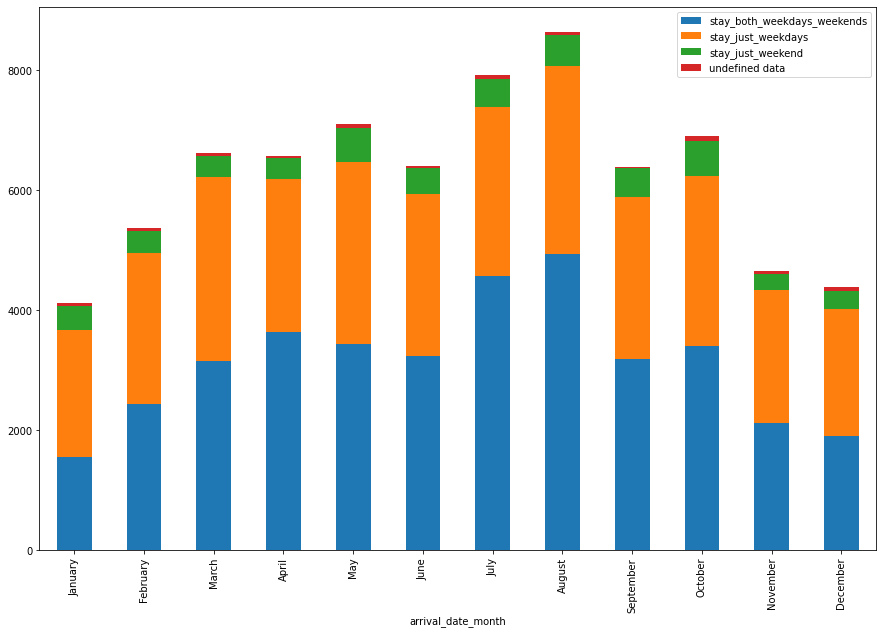

In [63]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

# How to create some more features 

In [64]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [65]:
def family(row):
    if (row['adults']>0) & (row['children']>0) & (row['babies']>0):
        return 1
    else:
        return 0

In [66]:
data['is_Family']=data.apply(family,axis=1)

In [67]:
data['total_customer']=data["adults"]+data["children"]+data["babies"]

In [68]:
data["total_nights"]=data["stays_in_week_nights"]+data["stays_in_weekend_nights"]

In [69]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_Family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,0,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,0,Transient,119.00,0,0,Canceled,12/22/2015,0,4.0,2


In [70]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_Family',
       'total_customer', 'total_nights'],
      dtype='object')

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119206 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [72]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [73]:
dict1={'No Deposit':0,"Non Refund":1,"Refundable":0}

In [74]:
data['deposit_given']=data["deposit_type"].map(dict1)

In [75]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_Family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [76]:
data.drop(columns=["adults","children","babies","deposit_type"],axis=1,inplace=True)

In [77]:
len(data.columns)

30

#  Feature encoding on data

In [78]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_Family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,0,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,...,Transient,119.00,0,0,Canceled,12/22/2015,0,4.0,2,0


In [79]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [80]:
cate_features=[col for col in data.columns if data[col].dtype=="object"]

In [81]:
num_features=[col for col in data.columns if data[col].dtype!="object"]

In [82]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_Family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [83]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [84]:
data_cat=data[cate_features]

In [85]:
data_cat

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015
...,...,...,...,...,...,...,...,...,...,...,...
119205,City Hotel,December,BB,BRA,Direct,Direct,E,F,Transient,Check-Out,1/6/2017
119206,City Hotel,December,SC,FRA,Online TA,TA/TO,A,A,Transient,Check-Out,1/6/2017
119207,City Hotel,December,BB,FRA,Offline TA/TO,TA/TO,A,B,Transient,Check-Out,1/7/2017
119208,City Hotel,December,SC,DEU,Online TA,TA/TO,A,A,Transient-Party,Check-Out,1/8/2017


In [86]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [87]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_Family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,0,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,...,Transient,119.00,0,0,Canceled,12/22/2015,0,4.0,2,0


In [88]:
data_cat['cancellation']=data['is_canceled']

In [89]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1


In [90]:
cols=data_cat.columns

In [91]:
cols=cols[0:-1]

In [92]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [93]:
##perform Mean Encoding Technique
for col in cols:
    dict2=data_cat.groupby([col])["cancellation"].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

In [94]:
data_cat

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1
3,0.277674,0.305016,0.344653,0.252336,0.367590,0.410598,0.391567,0.251373,0.407864,0.0,0.108247,0
4,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.364723,0.306002,0.407864,1.0,0.684211,1
...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.417859,0.350348,0.374106,0.373537,0.153712,0.174868,0.292683,0.247134,0.407864,0.0,0.569378,0
119206,0.417859,0.350348,0.374064,0.185848,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,0.569378,0
119207,0.417859,0.350348,0.374106,0.185848,0.343313,0.410598,0.391567,0.237233,0.407864,0.0,0.394737,0
119208,0.417859,0.350348,0.374064,0.167193,0.367590,0.410598,0.391567,0.445055,0.254504,0.0,0.303704,0


# Handle Outliers

In [95]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_Family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,0,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,0,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,0,3.0,11,0
119206,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [96]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [97]:
print(dataframe.columns)

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_Family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')


In [98]:
dataframe.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_Family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,0,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.407864,0.0,...,0,0,0,73.46,0,2,0,2.0,2,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.407864,1.0,...,0,0,0,119.00,0,0,0,4.0,2,0


In [99]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [100]:
dataframe.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_Family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,0,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.407864,0.0,...,0,0,0,73.46,0,2,0,2.0,2,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.407864,1.0,...,0,0,0,119.00,0,0,0,4.0,2,0


In [101]:
for i in dataframe.columns:
    print(i)

hotel
arrival_date_month
meal
country
market_segment
distribution_channel
reserved_room_type
assigned_room_type
customer_type
reservation_status
reservation_status_date
is_canceled
lead_time
arrival_date_year
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
booking_changes
days_in_waiting_list
adr
required_car_parking_spaces
total_of_special_requests
is_Family
total_customer
total_nights
deposit_given


<AxesSubplot: xlabel='lead_time', ylabel='Density'>

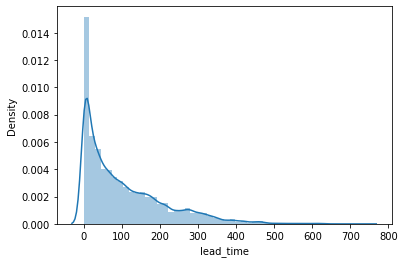

In [102]:
sns.distplot(dataframe['lead_time'])

In [103]:
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])

In [104]:
handle_outlier('lead_time')

<AxesSubplot: xlabel='lead_time', ylabel='Density'>

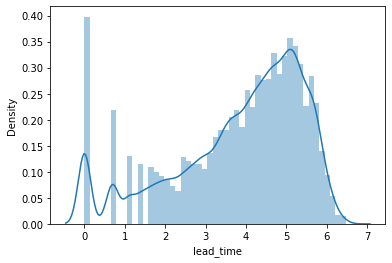

In [105]:
sns.distplot(dataframe['lead_time'])

<AxesSubplot: xlabel='adr', ylabel='Density'>

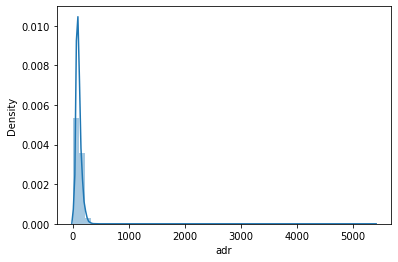

In [106]:
sns.distplot(dataframe['adr'])

In [107]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_Family,total_customer,total_nights,deposit_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [108]:
handle_outlier('adr')

In [109]:
dataframe['adr'].isnull().sum()

1

<AxesSubplot: xlabel='adr', ylabel='Density'>

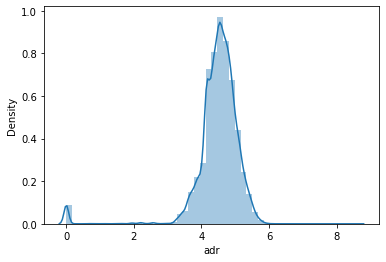

In [110]:
sns.distplot(dataframe['adr'].dropna())

# Select important Features using Co-relation & univariate analysis

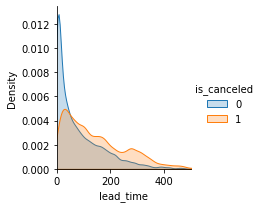

In [111]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

In [112]:
corr=dataframe.corr()

In [113]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_Family,total_customer,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.021158,-0.038772,-0.249747,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.000212,0.079088,0.045648,0.057361
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.005735,-0.003449,-0.055689,0.047597
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,0.009694,-0.117369,-0.160759,0.395685
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.037013,-0.023939,-0.004546,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.040632,0.087748,0.084999,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.032778,-0.246339,-0.188866,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.042367,-0.229073,-0.103571,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.018146,0.124348,0.037720,0.121789
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.014080,0.044811,0.018554,0.481507


In [114]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_Family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [115]:
features_to_drop=['reservation_status','reservation_status_date','arrival_date_year','arrival_date_week_number','stays_in_weekend_nights','arrival_date_day_of_month']

In [116]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [117]:
dataframe.shape

(119210, 24)

In [118]:
dataframe

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_Family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.391567,0.251373,0.254504,0,...,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.407654,0.352528,0.254504,0,...,0,0,0,4.763028,1,1,0,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.318108,0.251373,0.407864,1,...,0,0,0,4.499810,0,1,0,2.0,1,0
3,0.277674,0.305016,0.344653,0.252336,0.367590,0.410598,0.391567,0.251373,0.407864,0,...,0,0,0,4.310262,0,2,0,2.0,2,0
4,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.364723,0.306002,0.407864,1,...,0,0,0,4.787492,0,0,0,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.417859,0.350348,0.374106,0.373537,0.153712,0.174868,0.292683,0.247134,0.407864,0,...,0,4,0,4.777610,0,1,0,3.0,11,0
119206,0.417859,0.350348,0.374064,0.185848,0.367590,0.410598,0.391567,0.445055,0.407864,0,...,0,0,0,4.514589,0,1,0,2.0,7,0
119207,0.417859,0.350348,0.374106,0.185848,0.343313,0.410598,0.391567,0.237233,0.407864,0,...,0,0,0,4.649857,0,0,0,2.0,7,0
119208,0.417859,0.350348,0.374064,0.167193,0.367590,0.410598,0.391567,0.445055,0.254504,0,...,0,2,0,4.242333,0,2,0,2.0,12,0


# find Important features for model building..

In [119]:
dataframe.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_Family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0,...,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0,...,0,0,0,4.763028,1,1,0,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1,...,0,0,0,4.499810,0,1,0,2.0,1,0
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.407864,0,...,0,0,0,4.310262,0,2,0,2.0,2,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.407864,1,...,0,0,0,4.787492,0,0,0,4.0,2,0


In [120]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_Family                         0
total_customer                    4
total_nights                      0
deposit_given                     0
dtype: int64

In [121]:
dataframe.dropna(inplace=True)

In [122]:
x=dataframe.drop('is_canceled',axis=1)

In [123]:
y=dataframe['is_canceled']

In [124]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [125]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [126]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [127]:
cols=x.columns

In [128]:
#lets print the number of selected features
selected_feature=cols[feature_sel_model.get_support()]

In [129]:
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [130]:
x=x[selected_feature]

In [131]:
x

,country,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customer,total_nights,deposit_given
0,0.379365,4.700480,0,0,0,0,4.109890,0,1,2.0,1,0
1,0.379365,4.700480,0,0,0,0,4.763028,1,1,4.0,1,0
2,0.562958,1.098612,0,0,0,0,4.499810,0,1,2.0,1,0
3,0.252336,4.488636,0,0,0,0,4.310262,0,2,2.0,2,0
4,0.562958,3.044522,0,0,0,0,4.787492,0,0,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.373537,5.159055,0,0,4,0,4.777610,0,1,3.0,11,0
119206,0.185848,2.890372,0,0,0,0,4.514589,0,1,2.0,7,0
119207,0.185848,4.682131,0,0,0,0,4.649857,0,0,2.0,7,0
119208,0.167193,5.739793,0,0,2,0,4.242333,0,2,2.0,12,0


In [132]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119205, dtype: int64

In [164]:
x=x.drop(['previous_bookings_not_canceled'],axis=True)

In [165]:
x

,previous_cancellations,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customer,total_nights,deposit_given
0,0,0,0,4.109890,0,1,2.0,1,0
1,0,0,0,4.763028,1,1,4.0,1,0
2,0,0,0,4.499810,0,1,2.0,1,0
3,0,0,0,4.310262,0,2,2.0,2,0
4,0,0,0,4.787492,0,0,4.0,2,0
...,...,...,...,...,...,...,...,...,...
119205,0,4,0,4.777610,0,1,3.0,11,0
119206,0,0,0,4.514589,0,1,2.0,7,0
119207,0,0,0,4.649857,0,0,2.0,7,0
119208,0,2,0,4.242333,0,2,2.0,12,0


In [166]:
x.shape

(119205, 9)

In [167]:
y.shape

(119205,)

# Lets Build ML Model

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [169]:
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(("Naive_Bayes",GaussianNB()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [173]:
for name,model in models:
    print(name)
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print("Accuracy of",model,acc)
    print("="*50)

LogisticRegression
[[18117  6203]
 [  586  4896]]
Accuracy of LogisticRegression() 0.7721964968794041
Naive_Bayes
[[ 5713  1052]
 [12990 10047]]
Accuracy of GaussianNB() 0.5288235688879941
Random Forest
[[16181  3753]
 [ 2522  7346]]
Accuracy of RandomForestClassifier() 0.7894436614992283
Decision Tree
[[16177  3844]
 [ 2526  7255]]
Accuracy of DecisionTreeClassifier() 0.786255955976109
KNN
[[16277  4138]
 [ 2426  6961]]
Accuracy of KNeighborsClassifier() 0.7797463257499496


In [174]:
x_train.head(1)

,previous_cancellations,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customer,total_nights,deposit_given
13277,0,0,0,4.590868,0,0,2.0,5,0


In [175]:
y[0]

0

In [176]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [177]:
model.score(x_train,y_train)

0.8991532722615572

In [178]:
model.score(x_test,y_test)

0.7892758875243272

In [179]:
previous_cancellations=int(input("previous_cancellations : "))
booking_changes=int(input("booking_changes : "))
days_in_waiting_list=int(input("days_in_waiting_list : "))
adr=float(input("adr : "))
required_car_parking_spaces=int(input("required_car_parking_spaces : "))
total_of_special_requests=int(input("total_of_special_requests : "))
total_customer=float(input("total_customer : "))
total_nights=int(input("total_nights : "))
deposit_given=int(input("deposit_given : "))
pre=model.predict([[previous_cancellations,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customer,total_nights,deposit_given]])
# print(pre)
if pre==[0]:
    print("there is no chance to  Cancel")
else:
    print("there is a chance to cancel")

previous_cancellations : 0
booking_changes : 0
days_in_waiting_list : 0
adr : 4.9
required_car_parking_spaces : 1
total_of_special_requests : 1
total_customer : 2
total_nights : 5
deposit_given : 0
there is no chance to  Cancel


# Save MOdel 

In [185]:
import joblib
joblib.dump(model,"final_model.pkl")

['final_model.pkl']

In [188]:
Model=joblib.load("final_model.pkl")
Model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])